<a href="https://colab.research.google.com/github/pedrohspassos/Analise_dados_turbina_eolica/blob/main/Analise_Dados_Turbinas_Eolicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparando ambiente para realizar a análise**

---
**Objetivo**


*  Conectar na plataforma Kaggle com o Google Colab.

---
**Passo a passo**

1.   Criar um token para utilzar a API do Kaggle, retornando um aquivo .json e realizar o upload desse arquivo para o colab.

  *   é um arquivo de configuração que contém minhas credênciais de API do Kaggle.
  *   essas credênciais permitem que você se autentique na API do Kaggle e faça downloads de datasets diretamente do Kaggle.

2.   Usa o comando ***'pip install kaggle -q'*** para instalar a biblioteca 'Kaggle', que é uma interface Python para a API do Kaggle.
  *   é o que permite o acesso aos datasets.
  *   o argumento '-q' é abreviação de "quiet", e faz com que o comando pip simplifique a saída de informações durante o processo de instalação.

3. É necessario criar uma pasta que armazene o arquivo kaggle.json para que seja possível realizar o acesso a API. Foi feito:

  *   Criação da pasta.
  *   Movimentação do arquivo .json para a pasta criada.
  *   Atribuir uma permissão para a pasta criada.
  *   Essa pasta não é visivel no painel de arquivos do Colab, mas ainda sim é manipulavel via comandos do sheel.
     * !ls -la ~/.kaggle (listar conteudo do diretório).


4. Agora será feito o dowload do dataset que sera trabalhado nessa análise.


5. Realizando o unzip no dataset encontrado.
  * É criado uma pasta onde o caminho é: '/content/wind-turbine/T1.csv'.














---








1.   Upload do kaggle.json


In [109]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json




---

2.   Instalando a biblioteca Kaggle



In [110]:
pip install kaggle -q



---



3.   Criando a pasta




In [111]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle


total 16
drwxr-xr-x 2 root root 4096 Jul 26 12:00 .
drwx------ 1 root root 4096 Jul 26 12:00 ..
-rw------- 1 root root   71 Jul 26 18:05 kaggle.json




---


4.   Dowload do dataset





In [112]:
%cd /content/

!kaggle datasets download berkerisen/wind-turbine-scada-dataset

/content
Dataset URL: https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset
License(s): unknown
  0% 0.00/1.50M [00:00<?, ?B/s]
100% 1.50M/1.50M [00:00<00:00, 29.7MB/s]




---


5.   Realizando unzip





In [113]:
!unzip wind-turbine-scada-dataset.zip -d wind-turbine

Archive:  wind-turbine-scada-dataset.zip
  inflating: wind-turbine/T1.csv     




---



# **Partindo para a análise do Dataset**


---

**Contexto**

Nas turbinas eólicas, os sistemas Scada medem e guardam dados como a velocidade do vento, a direção do vento, a potência gerada, etc., em intervalos de 10 minutos. Este ficheiro foi retirado do sistema Scada de uma turbina eólica que está a funcionar e a gerar energia na Turquia.

Sistema Scada  é um software de coleta e gerenciamento de dados amplamente utilizado em processos industriais para acompanhamento do desempenho de máquinas e equipamentos.



---

**Dados presentes no dataset**


*   Data/Hora em intervalos de 10 minutos - Período comum de intervalo para sistemas eólicos.
*   Potência Ativa (kW) - Potência gerada pela turbina nesse intervalo.
*   Velocidade do vento (ms) - Velocidade do vento que a turbina utiliza para a produção de eletricidade.
*   Curva de Potência Teórica (kWh) - Os valores teóricos de potência que a turbina gera com essa velocidade do vento, fornecidos pelo fabricante da turbina.
*   Direção do vento (°) - As turbinas eólicas viram automaticamente para a direção em que vem o vento.




---
**Objetivo**


*   Analisar um dataset referente as turbinas eólicas, onde temos os dados de como as turbinas deveriam de fato funcionar, de acordo com a Curva de Potência Teórica, e como de fato ela funcionou, de acordo com a Potência Ativa.
*  Sabendo disso, vamos analisar se de fato as turbinas estão se comportando de acordo com o que o fabricante especificou como o ideal.
  * Para isso sera delimitado um erro aceitável para que os dados saiam desse comportamento ideal da curva.
  * A ideia é verificar quais os pontos que estão fora desse limite aceitavel, definido pela curva teórica, e quais os pontos que estão dentro do limite aceitável.


---





**0- Importando bibliotecas**



*   **Pandas**
  * biblioteca para a manipulação e análise de dados.
  * importante para trabalhar com arquivos csv ou algum outro tipo de dado tabular.
*   **Seaborn**
  * biblioteca de visualização de dados baseada no Matplotlib.
  * fornece uma interface de alto nível para criar gráficos estatísticos informativos.



In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.pyplot import figure


**1- Lendo o arquivo e realizando algumas tratativas**




In [115]:
turbina = pd.read_csv('/content/wind-turbine/T1.csv')
turbina.columns = ['Data/Hora', 'PotênciaAtiva(kW)', 'VelocidadeVento(ms)', 'CurvaPotênciaTeórica(kWh)', 'DireçãoVento(°)']
del turbina['DireçãoVento(°)']
turbina['Data/Hora'	] = pd.to_datetime(turbina['Data/Hora'],dayfirst=True)
display(turbina)


,Data/Hora,PotênciaAtiva(kW),VelocidadeVento(ms),CurvaPotênciaTeórica(kWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


**2- Plotando os dados em um gráfico - Dados Reais**

**Significado**

*   O gráfico abaixo mostra qual foi a potência gerada a partir de uma determinada velocidade do vento.
*   Podemos observar que mesmo com vento, em alguns momentos não foi gerado nenhuma potência.
  * pode ser devido a eventuais manutenções, ou uma eventual falha da turbina.

* Podemos observar que o plot dessas informações representa de certa maneira uma forma padrozinada, essa forma é justamente a curva teórica fornecida pelo fabricante.
   * Aparentemente:
    * Quanto menor a velocidade do vento, menor a potência que a turbina gera.
    * Quanto maior a velocidade do vento, maior a potência gerada pela turbina, porém até um certo limite.
   




Text(0.5, 1.0, 'Dados Reais')

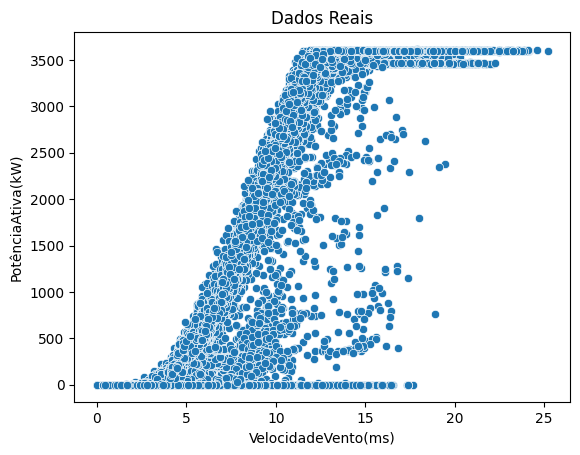

In [116]:

sns.scatterplot(data=turbina, x = 'VelocidadeVento(ms)', y = 'PotênciaAtiva(kW)')
plt.title('Dados Reais')

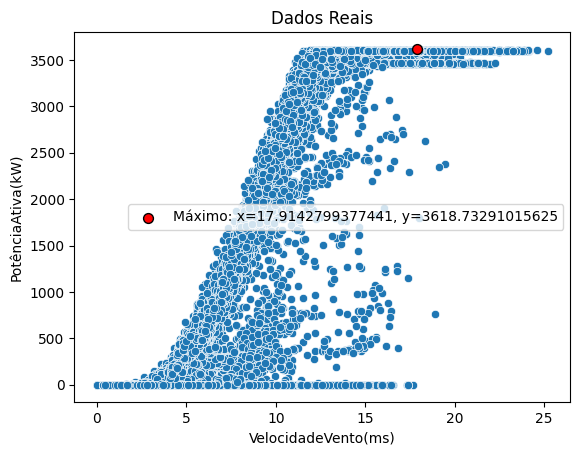

In [117]:
#Encontrando em que momento é obtido a potência real maxima
max_y = turbina['PotênciaAtiva(kW)'].max()
max_x = turbina[turbina['PotênciaAtiva(kW)'] == max_y]['VelocidadeVento(ms)'].values[0]

ax = sns.scatterplot(data=turbina, x='VelocidadeVento(ms)', y='PotênciaAtiva(kW)')

#Adicionando um ponto de destaque para o valor máximo
plt.scatter(max_x, max_y, color='red', s=50, edgecolor='black', label=f'Máximo: x={max_x}, y={max_y}')

#Adicionando título e legendas
plt.title('Dados Reais')
plt.legend()


**3- Plotando os dados em um gráfico - Dados Teóricos**

**Significado**
* Podemos observar que se trata de uma curva bem similar a curva do tipo sigmoidal.
* Similar a um modelo de crescimento logístico.
  * é um modelo muito utilizado quando se fala de ambientes populacionais, e também é frequentemente usada em aprendizado de máquina e estatística
  * nele é apresentado que as especies tendem a crescer de maneira exponencial, porém tendem a diminuir esse crescimento devido a sua densidade populacional, isso é, **Quantidade de recurso disponivel X Tamanho Populacional**.
  * Esse crescimento ocorre até atingir a capacidade de suporte do ambiente, no contexto populacional descrito.
  

  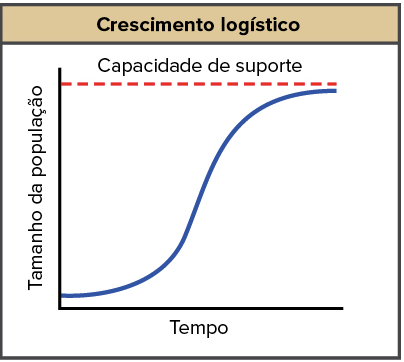


* Trazendo para o contexto estudado:
   * Temos que o limite é justamente o quanto uma turbina eólica consegue gerar de potencia.
   * Caso não tivesse essa limitação, assim como no exemplo populacional, encontrariamos um crescimento exponencial durante todo esse processo.
   * Abaixo podemos ver em que momento chegamos a potência máxima da turbina.

Text(0.5, 1.0, 'Dados Teóricos')

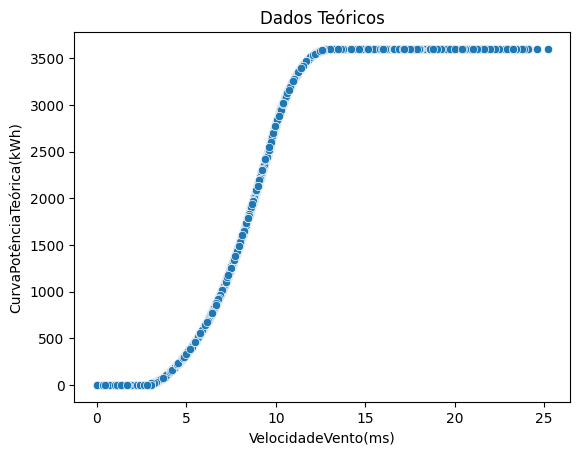

In [118]:
ax=sns.scatterplot(data=turbina, x = 'VelocidadeVento(ms)', y = 'CurvaPotênciaTeórica(kWh)')
plt.title('Dados Teóricos')

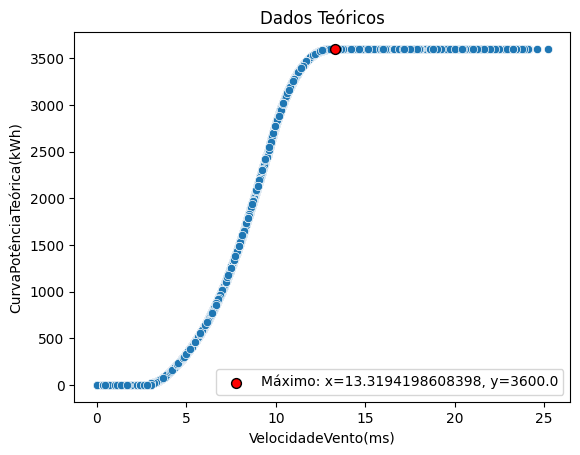

In [119]:
#Encontrando em que momento é obtido a potência teórica maxima
max_y = turbina['CurvaPotênciaTeórica(kWh)'].max()
max_x = turbina[turbina['CurvaPotênciaTeórica(kWh)'] == max_y]['VelocidadeVento(ms)'].values[0]

ax = sns.scatterplot(data=turbina, x='VelocidadeVento(ms)', y='CurvaPotênciaTeórica(kWh)')

#Adicionando um ponto de destaque para o valor máximo
plt.scatter(max_x, max_y, color='red', s=50, edgecolor='black', label=f'Máximo: x={max_x}, y={max_y}')

#Adicionando título e legendas
plt.title('Dados Teóricos')
plt.legend()

**4- Criando os limites aceitaveis**

* Em relação a curva teórica aprensentada, será aceito como dados aceitaveis aqueles que estiverem 5% para cima e 5% para baixo dessa curva.
  * Para cima, pois não faz sentido até certo ponto ela ser tão mais efetiva do que a especificação do próprio fabricante, assim podendo ser algum problema de sensor.
  * Para baixo, pois está abaixo da sua produção esperada.

* A ideia é criar uma nova coluna que ira ser responsável por mostrar se tais dados estão ou não dentro de um limite aceitável.

* O pontos de análise são:
  * Dentro do limite (ineficiente).
  * Fora do limte (ineficiente).
  * Quando a potência é zero (supondo que não seja uma ineficiencia, pode ser por exemplo que é devido uma manutenção preventiva na turbina ou algo similar).

In [120]:
#Transformando em lista para facilitar o tratamento

potencia_real = turbina['PotênciaAtiva(kW)'].tolist()
potencia_teorica = turbina['CurvaPotênciaTeórica(kWh)'].tolist()

#Criando novas listas para armazenar as potencias maximas e minimas (já com os 5% de aceitabilidade)
potencia_maxima = []
potencia_minima = []
dentro_limite = []

#Calculando os limites aceitaveis
for potencia in potencia_teorica:
    potencia_maxima.append(potencia * 1.05)
    potencia_minima.append(potencia * 0.95)

#Verificando se foi percorrido todos os valores
if len(potencia_teorica) != len(potencia_maxima) or len(potencia_teorica) != len(potencia_minima):
    raise ValueError("As listas devem ter o mesmo tamanho")

#Criando a lista contendo quais pontos satisfazem os limites
for p, potencia in enumerate(potencia_real):
    if potencia >= potencia_minima[p] and potencia <= potencia_maxima[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

#Descobrindo a porcentagem dessa distribuição
percentual_dentro = (dentro_limite.count('Dentro') / len(dentro_limite)) * 100
percentual_fora = (dentro_limite.count('Fora') / len(dentro_limite)) * 100
percentual_zero = (dentro_limite.count('Zero') / len(dentro_limite)) * 100


**5- Adicionando essa lista ao dataframe**

In [121]:
turbina['DentroDoLimite'] = dentro_limite
display(turbina)

,Data/Hora,PotênciaAtiva(kW),VelocidadeVento(ms),CurvaPotênciaTeórica(kWh),DentroDoLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


**6- Plotando o  gráfico dos dados reais com essas novas informações**



Text(0.5, 1.0, 'Dados Reais')

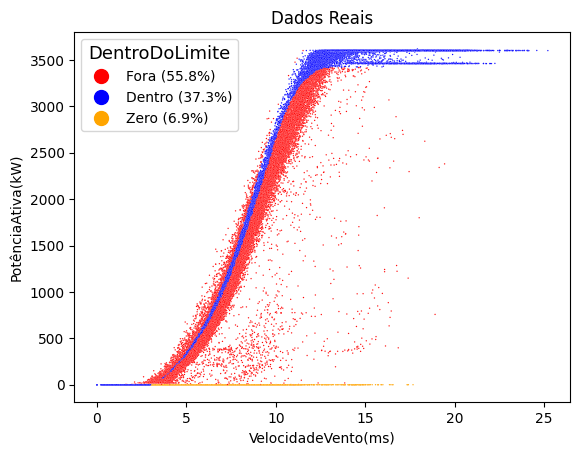

In [122]:
cores = {'Dentro': 'blue', 'Fora': 'red', 'Zero': 'orange'}
sns.scatterplot(data=turbina, x = 'VelocidadeVento(ms)', y = 'PotênciaAtiva(kW)', hue = 'DentroDoLimite', s=1, palette = cores)

#Criando handles personalizados
handles = [
    mlines.Line2D([], [], color='red', marker='o', markersize=10, linestyle='None',
                  label=f'Fora ({percentual_fora:.1f}%)'),
    mlines.Line2D([], [], color='blue', marker='o', markersize=10, linestyle='None',
                  label=f'Dentro ({percentual_dentro:.1f}%)'),
    mlines.Line2D([], [], color='orange', marker='o', markersize=10, linestyle='None',
                  label=f'Zero ({percentual_zero:.1f}%)')
]

#Adicionando a nova legenda ao gráfico
plt.legend(handles=handles, title='DentroDoLimite', title_fontsize='13', fontsize='10', loc='best')
plt.title('Dados Reais')

**7- Analisando a correlação dos dados**

* A partir da matriz de correlação conseguimos compreender as relações entre múltiplas variáveis em um conjunto de dados:
  * A correlação de 0.912774 entre PotênciaAtiva(kW) e VelocidadeVento(ms) é muito próxima de 1, indicando uma correlação positiva forte.
    * À medida que a velocidade do vento aumenta, a potência ativa da turbina também tende a aumentar. Isso sugere que há uma relação linear positiva  entre a velocidade do vento e a potência gerada pela turbina.
  * As correlações de valor 1 são as chamadas Autocorrelações, que normalmente ocorre quando umna variável é correlacionada consigo mesma.

* **Correlação Positiva Forte**: Pode indicar uma relação direta onde o aumento de uma variável causa o aumento de outra.
* **Correlação Negativa Forte**: Pode indicar uma relação inversa onde o aumento de uma variável causa a diminuição de outra.
* **Correlação Próxima de Zero**: Pode indicar que não há uma relação linear significativa entre as variáveis.


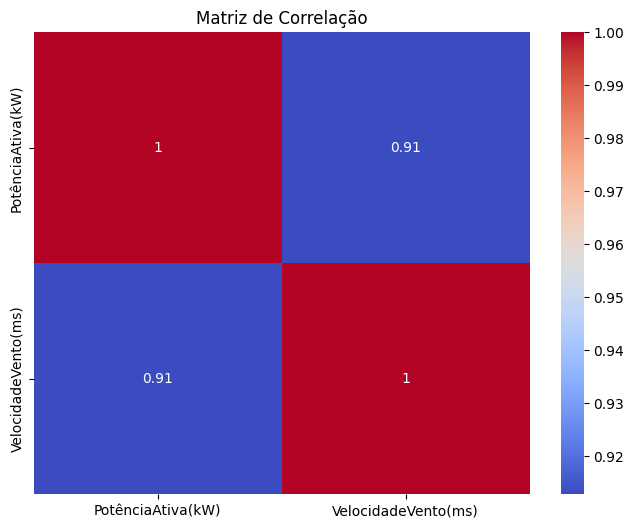

In [124]:
#Análise de Correlação
correlation_matrix = turbina[['PotênciaAtiva(kW)', 'VelocidadeVento(ms)']].corr()

#Visualizando a Correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()



**8- Conclusões**

A partir dessa análise podemos inferir alguns questionamentos que sejam pertinentes a serem apresentados para um eventual coordenador da empresa.

* É estranho essa turbina estar apresentando duas faixas de máximo, o que pode ser?
* Existe muitos momentos em que está sendo gerado uma quantidade de potência maior que a esperada, principalmente quando se trata de baixas velocidades do vento, será que pode ser um erro no anemômetro (sensor de vento normalmente utilizado)? Será que ele está desregulado?
* Se tratando de um parque heólico que possa ter até 40 turbinas, por que será que uma se comporta de maneira diferente da outro? Será que o fato de estarem posicionadas em locais diferentes tem influência?
